<a href="https://colab.research.google.com/github/Varshitha-Ganga27/Lungcancer-prediction-using-machinelearning/blob/main/lung_cancer_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
data = pd.read_csv("/content/survey lung cancer.csv")

In [ ]:
data.shape

(309, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
data.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
binary_columns = ['GENDER', 'LUNG_CANCER']

for col in binary_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

data.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


Lung Cancer distribution:
 LUNG_CANCER
1    270
0     39
Name: count, dtype: int64


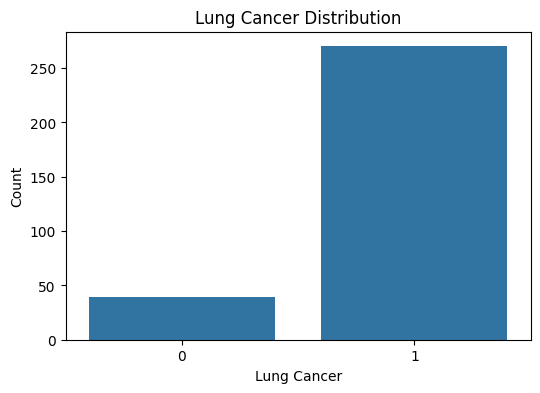

In [ ]:

cancer_counts = data['LUNG_CANCER'].value_counts()
print("Lung Cancer distribution:\n", cancer_counts)


plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=data)
plt.title('Lung Cancer Distribution')
plt.xlabel('Lung Cancer')
plt.ylabel('Count')
plt.show()


In [ ]:
import plotly.express as px

fig = px.pie(data,
             names='LUNG_CANCER',
             hole=0.5,
             color_discrete_sequence=["firebrick", "green"])

fig.show()


In [ ]:
from imblearn.over_sampling import SMOTE

X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

new_counts = y_resampled.value_counts()
print("New Lung Cancer distribution after SMOTE:\n", new_counts)


New Lung Cancer distribution after SMOTE:
 LUNG_CANCER
1    270
0    270
Name: count, dtype: int64


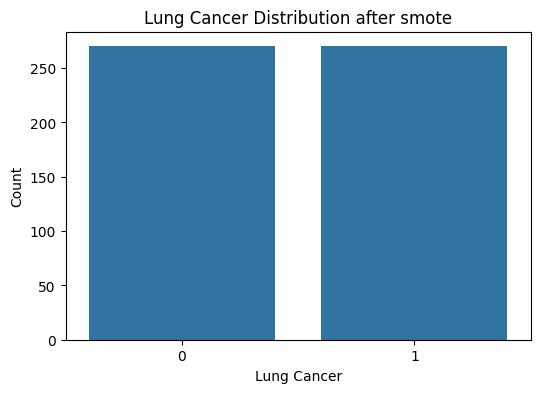

In [ ]:
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Lung Cancer'] = y_resampled
plt.figure(figsize=(6, 4))
sns.countplot(x='Lung Cancer', data=resampled_data)
plt.title('Lung Cancer Distribution after smote')
plt.xlabel('Lung Cancer')
plt.ylabel('Count')
plt.show()


In [ ]:

def detect_outliers_iqr(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    outliers = {}

    for col in numerical_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outliers[col] = outlier_indices.tolist()

    return outliers


outliers = detect_outliers_iqr(data)
print("Outliers detected in each numerical feature:")
for feature, indices in outliers.items():
    print(f"{feature}: {len(indices)} outliers")


Outliers detected in each numerical feature:
GENDER: 0 outliers
AGE: 2 outliers
SMOKING: 0 outliers
YELLOW_FINGERS: 0 outliers
ANXIETY: 0 outliers
PEER_PRESSURE: 0 outliers
CHRONIC DISEASE: 0 outliers
FATIGUE : 0 outliers
ALLERGY : 0 outliers
WHEEZING: 0 outliers
ALCOHOL CONSUMING: 0 outliers
COUGHING: 0 outliers
SHORTNESS OF BREATH: 0 outliers
SWALLOWING DIFFICULTY: 0 outliers
CHEST PAIN: 0 outliers
LUNG_CANCER: 39 outliers


In [ ]:

numerical_cols = ['AGE', 'SMOKING', 'WHEEZING',
                  'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                  'SWALLOWING DIFFICULTY', 'CHEST PAIN']

def cap_outliers(df, columns):
    for col in columns:
        cap_value = df[col].quantile(0.95)
        df[col] = np.where(df[col] > cap_value, cap_value, df[col])
        floor_value = df[col].quantile(0.05)
        df[col] = np.where(df[col] < floor_value, floor_value, df[col])
    return df

data = cap_outliers(data, numerical_cols)

for col in numerical_cols:
    print(f'After handling outliers, {col} outliers:')
    outliers_count = ((data[col] > data[col].quantile(0.95)) | (data[col] < data[col].quantile(0.05))).sum()
    print(f'  {outliers_count} outliers remain\n')


After handling outliers, AGE outliers:
  0 outliers remain

After handling outliers, SMOKING outliers:
  0 outliers remain

After handling outliers, WHEEZING outliers:
  0 outliers remain

After handling outliers, ALCOHOL CONSUMING outliers:
  0 outliers remain

After handling outliers, COUGHING outliers:
  0 outliers remain

After handling outliers, SHORTNESS OF BREATH outliers:
  0 outliers remain

After handling outliers, SWALLOWING DIFFICULTY outliers:
  0 outliers remain

After handling outliers, CHEST PAIN outliers:
  0 outliers remain



In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int']).columns.tolist()

scaler = StandardScaler()

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(data[numerical_cols].head())

     GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  PEER_PRESSURE  \
0  0.952579  0.856623 -1.135292        0.869300  1.003241      -1.003241   
1  0.952579  1.556879  0.880830       -1.150351 -0.996769      -1.003241   
2 -1.049781 -0.543888 -1.135292       -1.150351 -0.996769       0.996769   
3  0.952579  0.016317  0.880830        0.869300  1.003241      -1.003241   
4 -1.049781  0.016317 -1.135292        0.869300 -0.996769      -1.003241   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0        -1.009756  0.696833 -1.120480  0.892475           0.892475  0.852207   
1         0.990338  0.696833  0.892475 -1.120480          -1.120480 -1.173424   
2        -1.009756  0.696833 -1.120480  0.892475          -1.120480  0.852207   
3        -1.009756 -1.435063 -1.120480 -1.120480           0.892475 -1.173424   
4        -1.009756 -1.435063 -1.120480  0.892475          -1.120480  0.852207   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAI

In [ ]:
data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.018944,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.018944,1.000000,-0.078337,0.006870,0.036207,0.013650,0.001971,0.029213,0.049302,0.060251,0.040179,0.172468,-0.003715,-0.016445,-0.020036,0.075687
SMOKING,0.036277,-0.078337,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.006870,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.036207,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.013650,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,0.001971,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.029213,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.049302,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.060251,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


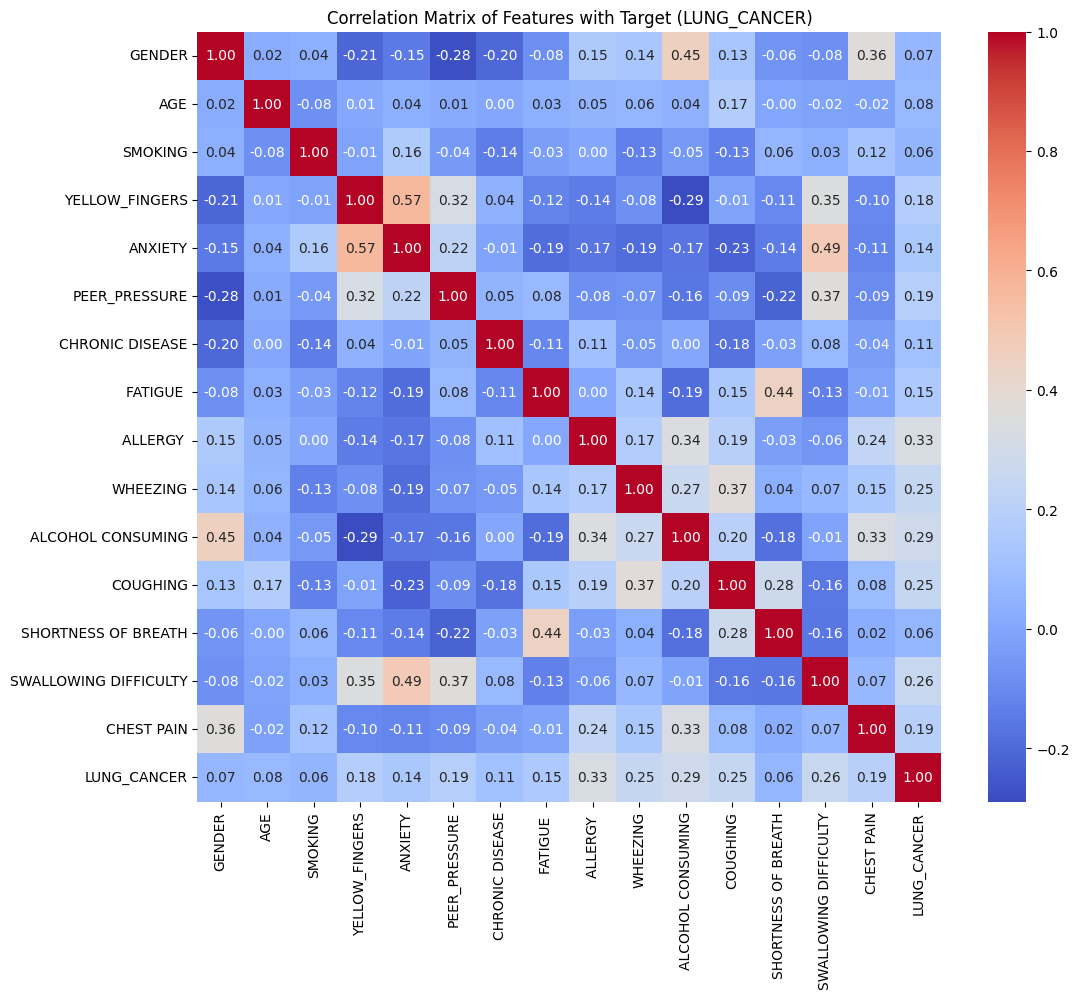

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features with Target (LUNG_CANCER)")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [ ]:

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")


K-Nearest Neighbors (KNN):
Accuracy: 0.9383
Precision: 0.9610
Recall: 0.9136
F1 Score: 0.9367


In [ ]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")


Decision Tree:
Accuracy: 0.9259
Precision: 0.9367
Recall: 0.9136
F1 Score: 0.9250


In [ ]:

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")


Logistic Regression:
Accuracy: 0.9630
Precision: 0.9412
Recall: 0.9877
F1 Score: 0.9639


In [ ]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")


Random Forest:
Accuracy: 0.9506
Precision: 0.9398
Recall: 0.9630
F1 Score: 0.9512


In [ ]:

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")


XGBoost:
Accuracy: 0.9506
Precision: 0.9398
Recall: 0.9630
F1 Score: 0.9512


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")

Naive Bayes Classifier:
Accuracy: 0.9506
Precision: 0.9294
Recall: 0.9753
F1 Score: 0.9518


                    Model   Accuracy  Precision     Recall   F1 Score
0     K-Nearest Neighbors  93.827160  96.103896  91.358025  93.670886
1           Decision Tree  92.592593  93.670886  91.358025  92.500000
2     Logistic Regression  96.296296  94.117647  98.765432  96.385542
3           Random Forest  95.061728  93.975904  96.296296  95.121951
4                 XGBoost  95.061728  93.975904  96.296296  95.121951
5  Naive Bayes Classifier  95.061728  92.941176  97.530864  95.180723


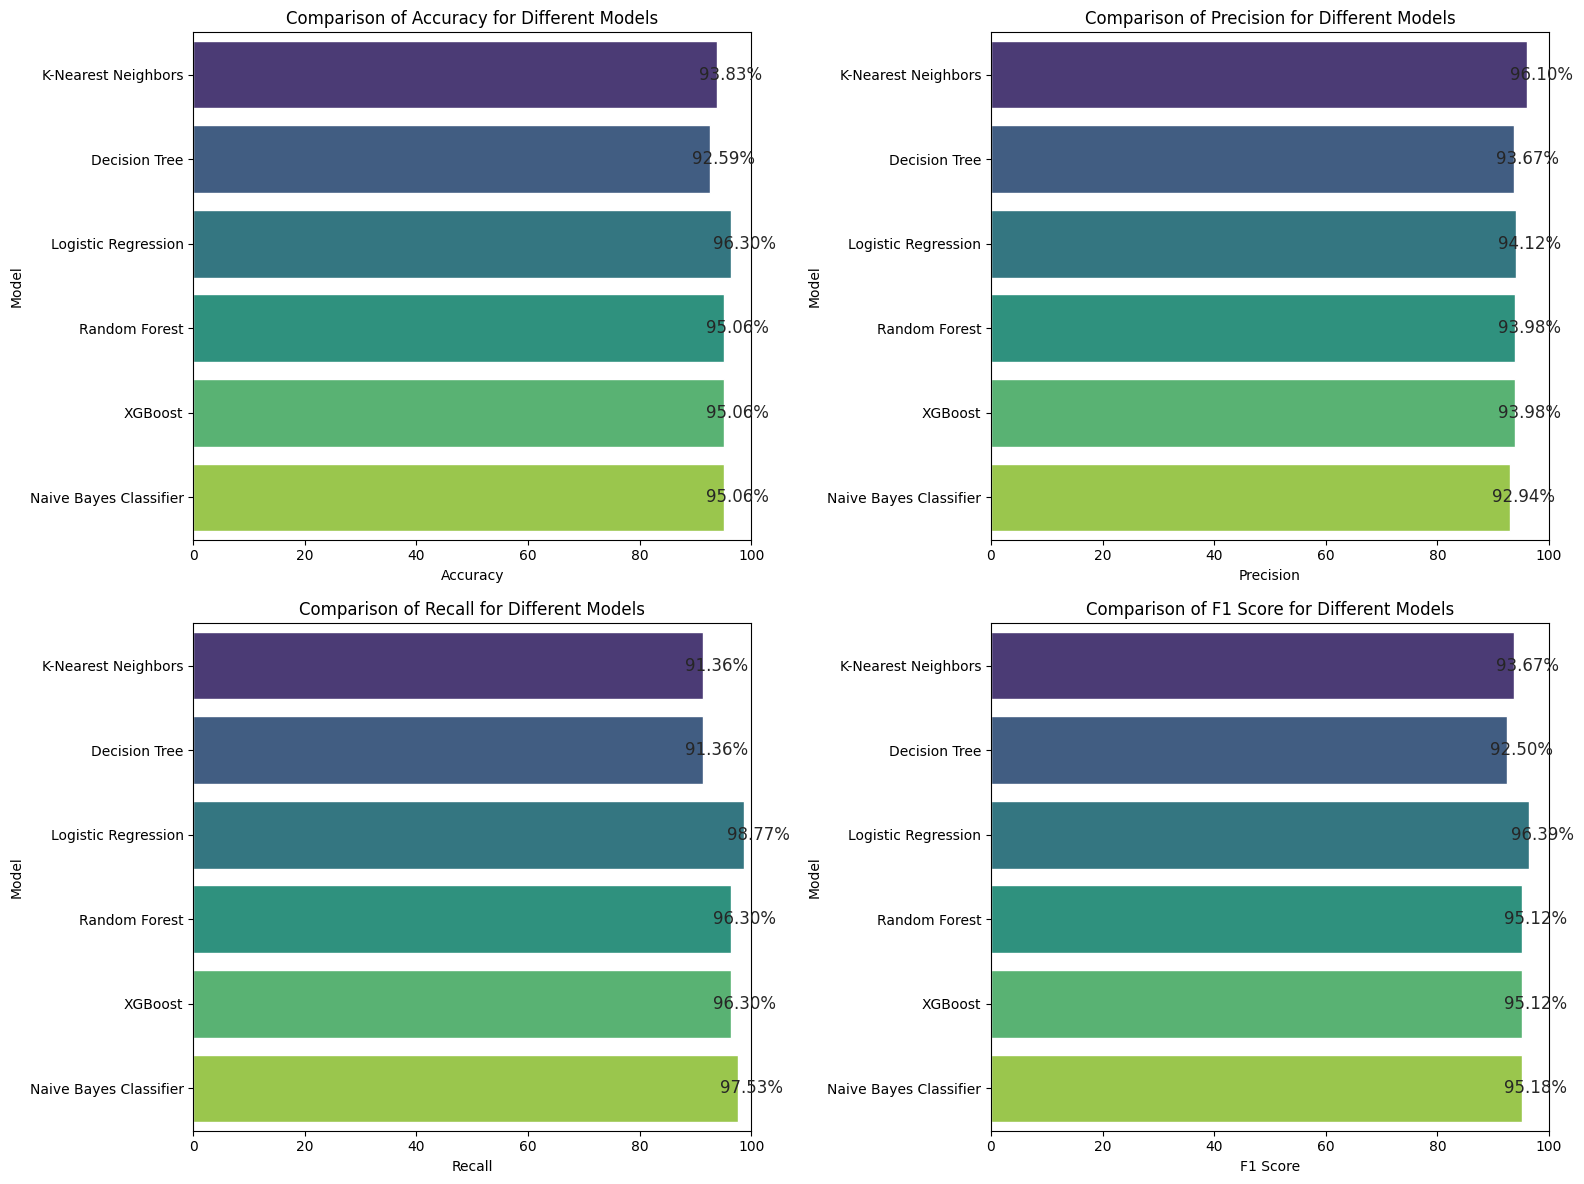

In [ ]:
metrics_summary = {
    'Model': ['K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'XGBoost','Naive Bayes Classifier'],
    'Accuracy': [accuracy_knn * 100, accuracy_dt * 100, accuracy_lr * 100, accuracy_rf * 100, accuracy_xgb * 100, accuracy_nb * 100],
    'Precision': [precision_knn * 100, precision_dt * 100, precision_lr * 100, precision_rf * 100, precision_xgb * 100 , precision_nb *100],
    'Recall': [recall_knn * 100, recall_dt * 100, recall_lr * 100, recall_rf * 100, recall_xgb * 100 , recall_nb *100],
    'F1 Score': [f1_knn * 100, f1_dt * 100, f1_lr * 100, f1_rf * 100, f1_xgb * 100 , f1_nb *100]
}
metrics_df = pd.DataFrame(metrics_summary)
print(metrics_df)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.set(style="whitegrid")

for i, metric in enumerate(metrics):
    sns.barplot(
        x=metric,
        y='Model',
        data=metrics_df,
        ax=axes[i // 2, i % 2],
        hue='Model',
        dodge=False,
        palette="viridis",
        legend=False
    )
    axes[i // 2, i % 2].set_title(f'Comparison of {metric} for Different Models')
    axes[i // 2, i % 2].set_xlim(0, 100)
    for p in axes[i // 2, i % 2].patches:
        width = p.get_width()
        axes[i // 2, i % 2].annotate(f'{width:.2f}%', (width, p.get_y() + p.get_height() / 2),
                                     ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:

print("Original number of features:", X_resampled.shape[1])
low_variance_filter = VarianceThreshold(threshold=0.01)
X_low_variance = low_variance_filter.fit_transform(X_resampled)
X_low_variance_df = pd.DataFrame(X_low_variance, columns=X_resampled.columns[low_variance_filter.get_support()])
print("Number of features after low variance filter:", X_low_variance_df.shape[1])
correlation_matrix = X_low_variance_df.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
X_high_correlation_filtered_df = X_low_variance_df.drop(columns=high_correlation_features)
print("Number of features after removing highly correlated features:", X_high_correlation_filtered_df.shape[1])
print("Removed features:", high_correlation_features)


Original number of features: 15
Number of features after low variance filter: 15
Number of features after removing highly correlated features: 15
Removed features: []


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def apply_hybrid_feature_selection(X, y, n_components):
    """
    Applies PCA for dimensionality reduction.
    Args:
        X: Feature matrix.
        y: Target vector (not used for PCA but included for hybrid methods).
        n_components: Number of principal components to keep.
    Returns:
        Transformed feature matrix.
    """
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return X_pca
def evaluate_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    models = {
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
        'Naive Bayes': GaussianNB()
    }

    results = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': []
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results['Model'].append(name)
        results['Accuracy'].append(accuracy_score(y_test, y_pred) * 100)
        results['Precision'].append(precision_score(y_test, y_pred, average='weighted') * 100)
        results['Recall'].append(recall_score(y_test, y_pred, average='weighted') * 100)
        results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted') * 100)

    return pd.DataFrame(results)

n_components_list = [5, 7, 9]
metrics_dfs = {}


for n_components in n_components_list:
    print(f"\n--- Evaluating with n_components = {n_components} ---")
    X_pca = apply_hybrid_feature_selection(X_resampled, y_resampled, n_components)
    metrics_dfs[n_components] = evaluate_models(X_pca, y_resampled)

for n_components, metrics_df in metrics_dfs.items():
    print(f"\nModel Performance After Feature Selection with n_components = {n_components}:")
    print(metrics_df)


comparison_df = pd.DataFrame({
    'Model': metrics_dfs[5]['Model'],
    'Accuracy_Before': metrics_df['Accuracy'],
    'Accuracy_5': metrics_dfs[5]['Accuracy'],
    'Accuracy_7': metrics_dfs[7]['Accuracy'],
    'Accuracy_9': metrics_dfs[9]['Accuracy'],
    'F1_Before': metrics_df['F1 Score'],
    'F1_5': metrics_dfs[5]['F1 Score'],
    'F1_7': metrics_dfs[7]['F1 Score'],
    'F1_9': metrics_dfs[9]['F1 Score']
})

print("\nComparison of Model Performance:")
print(comparison_df)


--- Evaluating with n_components = 5 ---

--- Evaluating with n_components = 7 ---

--- Evaluating with n_components = 9 ---

Model Performance After Feature Selection with n_components = 5:
                 Model   Accuracy  Precision     Recall   F1 Score
0  K-Nearest Neighbors  94.444444  94.451220  94.444444  94.444233
1        Decision Tree  93.827160  94.068966  93.827160  93.818681
2  Logistic Regression  94.444444  94.451220  94.444444  94.444233
3        Random Forest  96.913580  97.093023  96.913580  96.910637
4              XGBoost  93.827160  93.853897  93.827160  93.826220
5          Naive Bayes  96.296296  96.324539  96.296296  96.295732

Model Performance After Feature Selection with n_components = 7:
                 Model   Accuracy  Precision     Recall   F1 Score
0  K-Nearest Neighbors  95.679012  95.685976  95.679012  95.678848
1        Decision Tree  95.061728  95.089218  95.061728  95.060976
2  Logistic Regression  96.913580  96.978022  96.913580  96.912521
3    

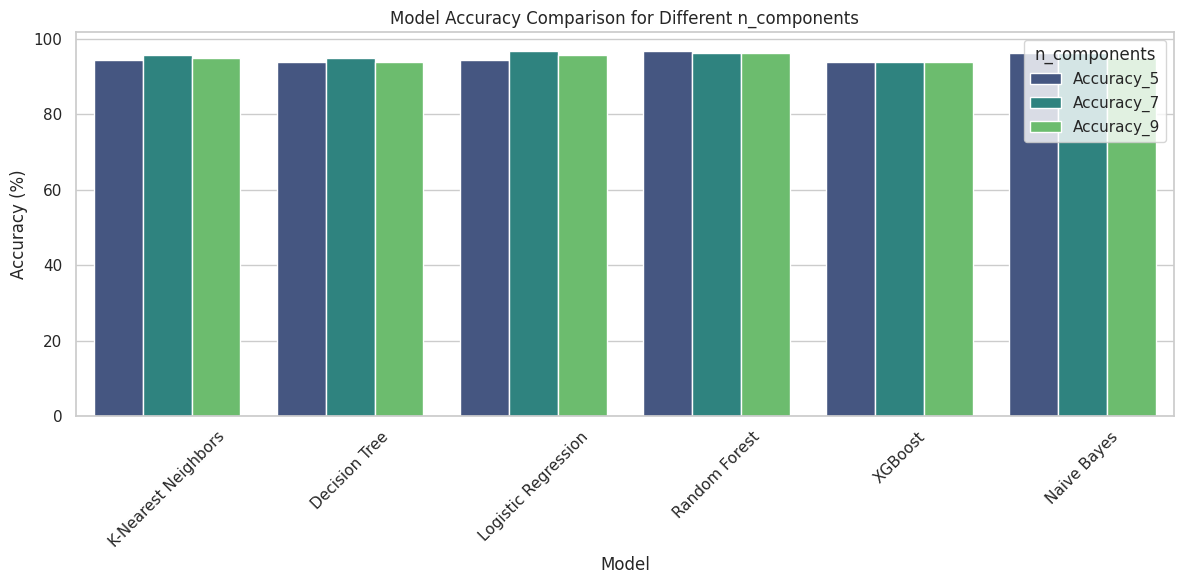

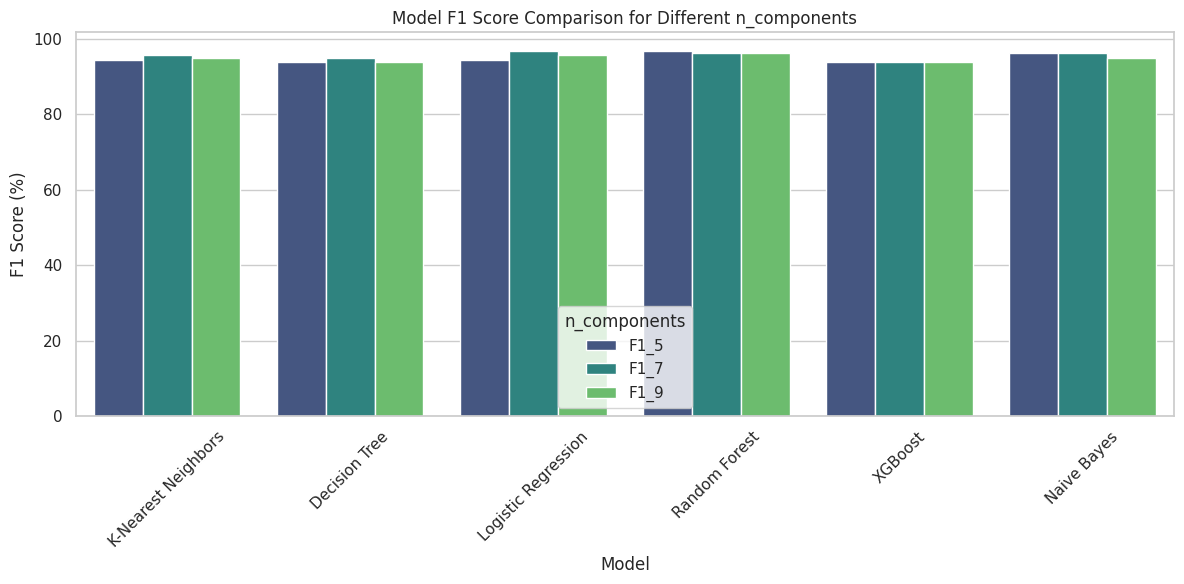

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


accuracy_data = comparison_df[['Model', 'Accuracy_5', 'Accuracy_7', 'Accuracy_9']].melt(id_vars='Model',
                                    value_vars=['Accuracy_5', 'Accuracy_7', 'Accuracy_9'],
                                    var_name='n_components', value_name='Accuracy')

f1_data = comparison_df[['Model', 'F1_5', 'F1_7', 'F1_9']].melt(id_vars='Model',
                               value_vars=['F1_5', 'F1_7', 'F1_9'],
                               var_name='n_components', value_name='F1 Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='n_components', data=accuracy_data, palette='viridis')
plt.title('Model Accuracy Comparison for Different n_components')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1 Score', hue='n_components', data=f1_data, palette='viridis')
plt.title('Model F1 Score Comparison for Different n_components')
plt.xlabel('Model')
plt.ylabel('F1 Score (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


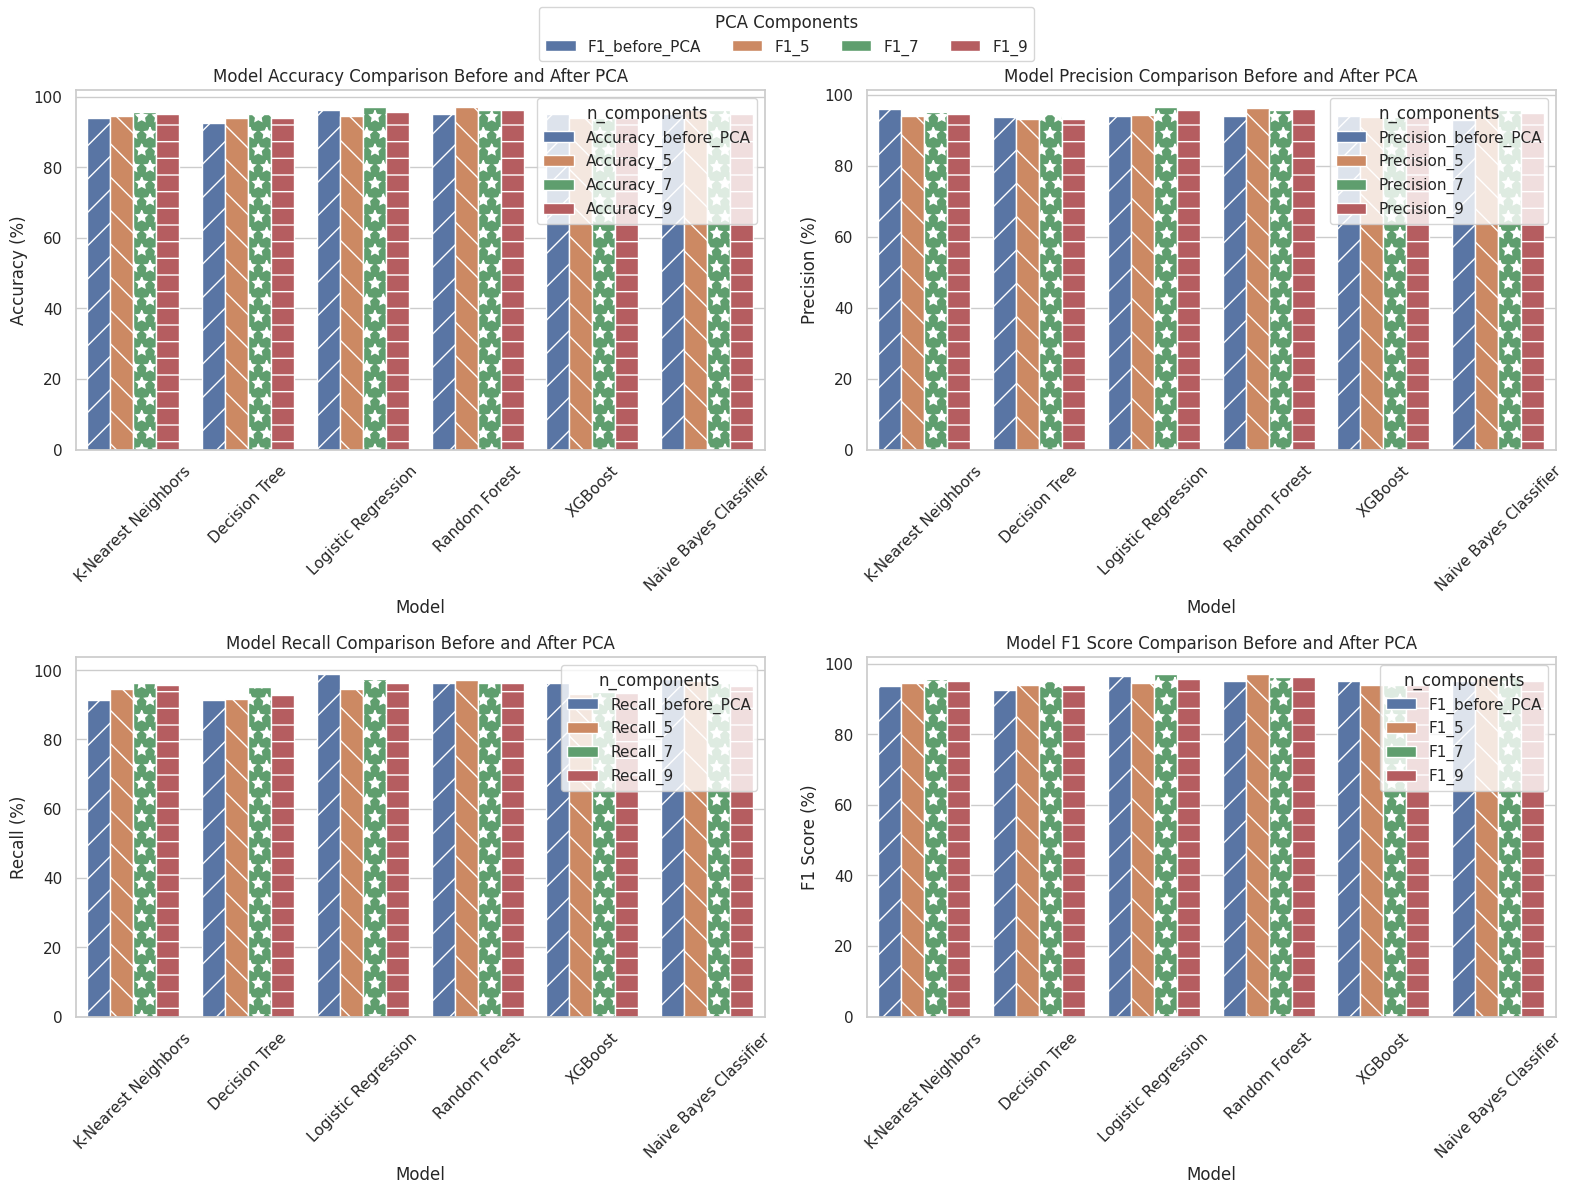

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the data
comparison_df = pd.DataFrame({
    'Model': [
        'K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression',
        'Random Forest', 'XGBoost', 'Naive Bayes Classifier'
    ],
    'Accuracy_before_PCA': [93.83, 92.59, 96.30, 95.06, 95.06, 95.06],
    'Accuracy_5': [94.44, 93.83, 94.44, 96.91, 93.83, 96.30],
    'Accuracy_7': [95.68, 95.06, 96.91, 96.30, 93.83, 96.30],
    'Accuracy_9': [95.06, 93.83, 95.68, 96.30, 93.83, 95.06],
    'Precision_before_PCA': [96.10, 93.67, 94.12, 93.98, 93.98, 92.94],
    'Precision_5': [94.10, 93.20, 94.40, 96.40, 93.80, 96.00],
    'Precision_7': [95.10, 94.60, 96.50, 95.90, 93.80, 95.90],
    'Precision_9': [94.60, 93.30, 95.70, 96.20, 93.70, 95.00],
    'Recall_before_PCA': [91.36, 91.36, 98.77, 96.30, 96.30, 97.53],
    'Recall_5': [94.60, 91.80, 94.50, 97.10, 93.20, 96.80],
    'Recall_7': [96.40, 95.20, 97.50, 96.20, 93.80, 96.30],
    'Recall_9': [95.70, 92.70, 96.40, 96.30, 93.30, 95.50],
    'F1_before_PCA': [93.67, 92.50, 96.39, 95.12, 95.12, 95.18],
    'F1_5': [94.44, 93.82, 94.44, 96.91, 93.83, 96.30],
    'F1_7': [95.68, 95.06, 96.91, 96.29, 93.83, 96.29],
    'F1_9': [95.06, 93.83, 95.67, 96.29, 93.83, 95.06]
})

# Reshape data for plotting each metric
accuracy_data = comparison_df[['Model', 'Accuracy_before_PCA', 'Accuracy_5', 'Accuracy_7', 'Accuracy_9']].melt(
    id_vars='Model',
    value_vars=['Accuracy_before_PCA', 'Accuracy_5', 'Accuracy_7', 'Accuracy_9'],
    var_name='n_components',
    value_name='Accuracy'
)

precision_data = comparison_df[['Model', 'Precision_before_PCA', 'Precision_5', 'Precision_7', 'Precision_9']].melt(
    id_vars='Model',
    value_vars=['Precision_before_PCA', 'Precision_5', 'Precision_7', 'Precision_9'],
    var_name='n_components',
    value_name='Precision'
)

recall_data = comparison_df[['Model', 'Recall_before_PCA', 'Recall_5', 'Recall_7', 'Recall_9']].melt(
    id_vars='Model',
    value_vars=['Recall_before_PCA', 'Recall_5', 'Recall_7', 'Recall_9'],
    var_name='n_components',
    value_name='Recall'
)

f1_data = comparison_df[['Model', 'F1_before_PCA', 'F1_5', 'F1_7', 'F1_9']].melt(
    id_vars='Model',
    value_vars=['F1_before_PCA', 'F1_5', 'F1_7', 'F1_9'],
    var_name='n_components',
    value_name='F1 Score'
)

# Define updated hatch patterns for each PCA setting
hatches = ['/', '\\', '*', '-']  # Changed the third pattern from '|' to '*'

# Plot each metric
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Helper function to apply hatches
def apply_hatch(ax, hatches):
    for bars, hatch in zip(ax.containers, hatches):
        for bar in bars:
            bar.set_hatch(hatch)

# Accuracy Plot
sns.barplot(x='Model', y='Accuracy', hue='n_components', data=accuracy_data, ax=axes[0, 0])
apply_hatch(axes[0, 0], hatches)
axes[0, 0].set_title('Model Accuracy Comparison Before and After PCA')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Accuracy (%)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Precision Plot
sns.barplot(x='Model', y='Precision', hue='n_components', data=precision_data, ax=axes[0, 1])
apply_hatch(axes[0, 1], hatches)
axes[0, 1].set_title('Model Precision Comparison Before and After PCA')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Precision (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Recall Plot
sns.barplot(x='Model', y='Recall', hue='n_components', data=recall_data, ax=axes[1, 0])
apply_hatch(axes[1, 0], hatches)
axes[1, 0].set_title('Model Recall Comparison Before and After PCA')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Recall (%)')
axes[1, 0].tick_params(axis='x', rotation=45)

# F1 Score Plot
sns.barplot(x='Model', y='F1 Score', hue='n_components', data=f1_data, ax=axes[1, 1])
apply_hatch(axes[1, 1], hatches)
axes[1, 1].set_title('Model F1 Score Comparison Before and After PCA')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('F1 Score (%)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Add legend with hatch patterns
handles, labels = axes[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, title='PCA Components')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the legend
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

def analyze_pca_components(X, n_components):
    # Perform PCA
    pca = PCA(n_components=n_components)
    pca.fit(X)

    # Get feature names
    feature_names = X.columns

    # Create a DataFrame of component loadings
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=feature_names
    )

    # Calculate explained variance ratio
    explained_variance = pca.explained_variance_ratio_

    # For each component, get the most influential features
    influential_features = {}
    for i in range(n_components):
        pc = f'PC{i+1}'
        # Get absolute loadings for this component
        abs_loadings = abs(loadings[pc])
        # Sort features by absolute loading values
        sorted_features = abs_loadings.sort_values(ascending=False)
        # Get features with significant contribution (arbitrary threshold of 0.3)
        significant_features = sorted_features[sorted_features > 0.3]
        influential_features[pc] = significant_features

    return loadings, explained_variance, influential_features

# Get results for different numbers of components
for n_comp in [5, 7, 9]:
    print(f"\nAnalysis for {n_comp} components:")
    loadings, exp_var, inf_features = analyze_pca_components(X_resampled, n_comp)

    print("\nExplained variance ratio:")
    for i, var in enumerate(exp_var):
        print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%)")

    print("\nMost influential features for each component:")
    for pc, features in inf_features.items():
        print(f"\n{pc}:")
        for feat, loading in features.items():
            print(f"{feat}: {loading:.3f}")


Analysis for 5 components:

Explained variance ratio:
PC1: 0.953 (95.3%)
PC2: 0.013 (1.3%)
PC3: 0.007 (0.7%)
PC4: 0.006 (0.6%)
PC5: 0.004 (0.4%)

Most influential features for each component:

PC1:
AGE: 1.000

PC2:
ALLERGY : 0.350
ALCOHOL CONSUMING: 0.349
WHEEZING: 0.349
CHEST PAIN: 0.343
COUGHING: 0.328

PC3:
ANXIETY: 0.478
YELLOW_FINGERS: 0.434
SHORTNESS OF BREATH: 0.402
SWALLOWING DIFFICULTY: 0.338
FATIGUE : 0.334

PC4:
GENDER: 0.506
SHORTNESS OF BREATH: 0.476
FATIGUE : 0.465

PC5:
SMOKING: 0.716
CHRONIC DISEASE: 0.586

Analysis for 7 components:

Explained variance ratio:
PC1: 0.953 (95.3%)
PC2: 0.013 (1.3%)
PC3: 0.007 (0.7%)
PC4: 0.006 (0.6%)
PC5: 0.004 (0.4%)
PC6: 0.003 (0.3%)
PC7: 0.003 (0.3%)

Most influential features for each component:

PC1:
AGE: 1.000

PC2:
ALLERGY : 0.350
ALCOHOL CONSUMING: 0.349
WHEEZING: 0.349
CHEST PAIN: 0.343
COUGHING: 0.328

PC3:
ANXIETY: 0.478
YELLOW_FINGERS: 0.434
SHORTNESS OF BREATH: 0.402
SWALLOWING DIFFICULTY: 0.338
FATIGUE : 0.334

PC4:
GENDER:

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

def analyze_pca_features(X, n_components):
    """
    Perform PCA and identify significant features for each principal component.
    """
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA(n_components=n_components)
    pca.fit(X_scaled)

    # Get feature names
    feature_names = X.columns

    # Create DataFrame with component loadings
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=feature_names
    )

    # For each component, identify the most influential features
    significant_features = {}
    for i in range(n_components):
        pc = f'PC{i+1}'
        # Get absolute loadings for this component
        abs_loadings = abs(loadings[pc])
        # Sort features by absolute loading values
        sorted_features = abs_loadings.sort_values(ascending=False)
        # Get top features (those with absolute loading > 0.3)
        significant_features[pc] = sorted_features[sorted_features > 0.3]

    return significant_features

def create_pca_summary_table(X, n_components_list):
    """
    Create a summary table comparing PCA components across different n_components
    """
    summary_data = []

    # Analyze PCA for each n_components
    for n_components in n_components_list:
        significant_features = analyze_pca_features(X, n_components)

        for pc, features in significant_features.items():
            row = {
                "n_components": n_components,
                "Component": pc,
                "Top Features": ', '.join(
                    [f"{feature} ({loading:.3f})" for feature, loading in features.items()]
                )
            }
            summary_data.append(row)

    # Convert to DataFrame
    summary_table = pd.DataFrame(summary_data)
    return summary_table

# Main execution
def main():
    # List of n_components to analyze
    n_components_list = [5, 7, 9]

    # Create summary table
    summary_table = create_pca_summary_table(X, n_components_list)

    # Display table with borders
    print("\nPCA Summary Table:")
    print(tabulate(summary_table, headers="keys", tablefmt="grid"))

    # Optionally save to CSV
    summary_table.to_csv("pca_summary_table.csv", index=False)
    print("\nTable saved as 'pca_summary_table.csv'.")

# Example usage with your data
X = X_resampled  # Replace with your dataset
main()



PCA Summary Table:
+----+----------------+-------------+-----------------------------------------------------------------------------------------------------+
|    |   n_components | Component   | Top Features                                                                                        |
+====+================+=============+=====================================================================================================+
|  0 |              5 | PC1         | WHEEZING (0.356), ALCOHOL CONSUMING (0.355), ALLERGY  (0.354), COUGHING (0.335), CHEST PAIN (0.331) |
+----+----------------+-------------+-----------------------------------------------------------------------------------------------------+
|  1 |              5 | PC2         | ANXIETY (0.491), YELLOW_FINGERS (0.436), SWALLOWING DIFFICULTY (0.384), SHORTNESS OF BREATH (0.315) |
+----+----------------+-------------+-----------------------------------------------------------------------------------------------------+
